<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Regularización en Modelos Lineeales  </h2> 

---

# Aspectos Teóricos

## Introducción

Uno de los aspectos más importante que debemos tener en cuenta a la hora de desarrollar modelos de machine learning, es la complejidad del modelo. Por un lado, podemos crear un modelo de muy poca complejidad que termine siendo un modelo muy general y sobregeneraliza, en este caso se dice que hay **underfitting**. Por otro lado, podemos crear un modelo que resulta extremadamente complejo y que se sobreajusta a los datos, aprendiendo los errores que hay en los mismos. En este caso estaríamos cometiendo **overfitting**, lo cual es malo en cualquier modelo. Estos último modelos se caracterizar por tener una tasa muy alta de precisión en la fase de entrenamiento y un pobre desempeño en la fase de validación.

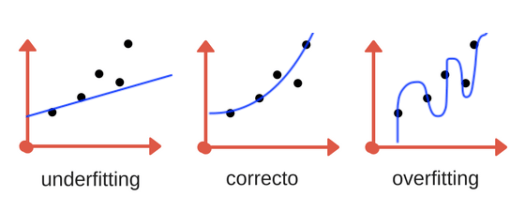

## Medidas de Complejidad

En los modelos lineales, la complejidad  se determina usando las norma $L_1$ y $L_2$. cada una viene dada por la siguiente expresión:

* $\mbox{Norma }L_1 = \displaystyle\sum_{i=1}^{n} |\beta_{i}|$
* $\mbox{Norma }L_2 = \displaystyle\sum_{i=1}^{n} \beta_{i}^2$

donde $\beta_{i}$ se corresponde con los coeficientes del modelo que se quiere ajustar.

## Regularización

La regularización permite controlar la complejidad de los modelos. Para ello, a la hora de determinar los parámetros óptimos que minimizan los residuos del modelo, ahora se agrega una variable que controla la complejidad.

### Regularizaciones más comunes

* **Regularización de lasso:** La regularización de lasso, usa la norma $L_1$ y el parámetro $\lambda$ para controlar la complejidad del modelo, viene dada por la siguiente expresión:
$$\min_{\hat\alpha, \hat\beta} \sum_{i=1}^{n}(y_{i}-(\hat\alpha+\hat\beta x_i))^2 +\lambda \sum_{i=1}^{n}|\beta_i|, \mbox{ con }0\le\lambda\le 1$$

* **Regularización de ridge:** La regularización de ridge, usa la norma $L_2$ y el parámetro $\lambda$ para controlar la complejidad del modelo, viene dada por la siguiente expresión:
$$\min_{\hat\alpha, \hat\beta} \sum_{i=1}^{n}(y_{i}-(\hat\alpha+\hat\beta x_i))^2 +\lambda \sum_{i=1}^{n}\beta_i^2, \mbox{ con }0\le\lambda\le 1 $$

* **Regularización de ElasticNet:** La regularización de ElasticNet, usa tanto la norma $L_1$ como la norma $L_2$, es una combinación de la regularización de lasso y la regularización de ridge. En este caso usa dos parámetros $\lambda_1$ y $\lambda_1$ para controlar la complejidad del modelo, viene dada por la siguiente expresión:
$$\min_{\hat\alpha, \hat\beta} \sum_{i=1}^{n}(y_{i}-(\hat\alpha+\hat\beta x_i))^2 +\lambda_1 \sum_{i=1}^{n}|\beta_i|+ \lambda_2 \sum_{i=1}^{n}\beta_i^2, \mbox{ con }0\le\lambda_1,\lambda_2 \le 1$$

# Práctica

### Importamos libreria

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import (LinearRegression, Lasso, Ridge, ElasticNet)

### Importamos dataset

In [2]:
dataset = pd.read_csv('datos/vehiculos.csv')

In [3]:
X = dataset[["desplazamiento","cilindros","consumo"]]
y = dataset["co2"]

### Creamos variables polinomiales para luego ajustar modelos

In [4]:
newX = PolynomialFeatures(3).fit_transform(X)

### Ajuste de modelos con variables polinómicas

In [5]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(newX,y)

LinearRegression()

### Ajuste de modelo Lasso

In [6]:
modelo_lasso = Lasso(tol=0.01,max_iter=3000)
modelo_lasso.fit(newX,y)

Lasso(max_iter=3000, tol=0.01)

### Ajuste de modelo Ridge

In [7]:
modelo_ridge = Ridge(tol=0.01,max_iter=3000)
modelo_ridge.fit(newX,y)

Ridge(max_iter=3000, tol=0.01)

### Ajuste de modelo ElasticNet

In [8]:
modelo_elastic = ElasticNet(tol=0.01,max_iter=3000)
modelo_elastic.fit(newX,y)

ElasticNet(max_iter=3000, tol=0.01)

### Tabla comparativa

In [9]:
diccionario ={'norma_l1': [norm(modelo_lineal.coef_,1) , norm(modelo_lasso.coef_,1), norm(modelo_ridge.coef_,1), norm(modelo_elastic.coef_,1)] , 'norma_l2': [norm(modelo_lineal.coef_,2) , norm(modelo_lasso.coef_,2), norm(modelo_ridge.coef_,2), norm(modelo_elastic.coef_,2)]}

In [10]:
Resultados = pd.DataFrame(data=diccionario, index=['Lineal', 'Lasso', 'Ridge', 'Elastic'])

In [11]:
Resultados.head()

,norma_l1,norma_l2
Lineal,491.197793,231.251344
Lasso,53.035281,43.608527
Ridge,306.553983,142.292421
Elastic,20.888645,9.541164


### Porcentaje de reducción de complejidad

In [12]:
rd_l1 = Resultados.loc['Lineal']['norma_l1']
rd_l2 = Resultados.loc['Lineal']['norma_l2']

Resultados['reduccion_l1'] = 1-Resultados.norma_l1/rd_l1
Resultados['reduccion_l2'] = 1-Resultados.norma_l2/rd_l2

In [13]:
Resultados.head()

,norma_l1,norma_l2,reduccion_l1,reduccion_l2
Lineal,491.197793,231.251344,0.000000,0.000000
Lasso,53.035281,43.608527,0.892029,0.811424
Ridge,306.553983,142.292421,0.375905,0.384685
Elastic,20.888645,9.541164,0.957474,0.958741


### Visualización de los coeficientes de cada modelo

In [14]:
modelo_lineal.coef_

array([ 0.00000000e+00, -1.69729290e+02,  7.78958470e+01, -1.23075873e+02,
       -1.98800368e+01,  5.06628299e+01,  7.14039435e+00, -1.87596231e+01,
       -4.59189895e+00,  3.71062157e+00,  3.18791426e+00, -5.56363819e+00,
        1.51041629e+00,  2.07296373e+00, -2.38106927e+00, -4.05155270e-02,
       -9.14478039e-02,  7.97874367e-01,  6.27777720e-02, -4.27609774e-02])

In [15]:
modelo_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.32931112e+01,
        4.15019272e+00,  4.88273123e-01, -2.95706310e+00,  9.52323687e-01,
       -4.59748116e-01,  2.29639858e-01, -8.72292028e-02, -2.44227267e-02,
        5.42742516e-02, -6.80167971e-02, -4.22377945e-02,  8.83746485e-02,
        3.33170931e-02, -7.04598512e-02,  3.09045473e-02,  5.69265699e-03])

In [16]:
modelo_ridge.coef_

array([ 0.00000000e+00, -6.64030781e+01,  3.54284124e+01, -1.11380227e+02,
       -2.16840991e+01,  3.86824887e+01,  9.99306185e-01, -1.22632242e+01,
       -2.18458177e+00,  3.30264172e+00,  2.97835130e+00, -4.91986615e+00,
        1.48972007e+00,  2.00842529e+00, -1.93060949e+00,  4.68286751e-02,
       -2.05650697e-01,  5.77819119e-01,  3.06742304e-02, -3.79789277e-02])

In [17]:
modelo_elastic.coef_

array([ 0.        , -0.        ,  0.        , -0.19245445,  0.5268661 ,
        5.56933614,  0.        ,  6.02105087, -4.44698113, -1.21838989,
        1.10422026, -0.8376852 , -0.06280685, -0.44574737, -0.19719822,
        0.01997073, -0.01383465, -0.07167723,  0.14094182,  0.01948427])